In [5]:
from astroquery.vizier import Vizier
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
import numpy as np
from mw_plot import MWSkyMap

EN GENERAL DECIR CUALES SON DE NUESTRA GALAXIA, CUALES NO.. ETC

In [6]:
vizier = Vizier() # this instantiates Vizier with its default parameters
catalog_list = vizier.find_catalogs('batse')
for k, v in catalog_list.items():
    print(k, ":", v.description)

IX/20A : The Fourth BATSE Burst Revised Catalog (Paciesas+ 1999)


In [7]:
vizier.ROW_LIMIT = -1
BATSE_cat = vizier.get_catalogs("IX/20A")
BATSE_cat

TableList with 6 tables:
	'0:IX/20A/batse' with 8 column(s) and 2704 row(s) 
	'1:IX/20A/4brcom' with 3 column(s) and 3061 row(s) 
	'2:IX/20A/duration' with 7 column(s) and 2041 row(s) 
	'3:IX/20A/flux' with 7 column(s) and 2135 row(s) 
	'4:IX/20A/maxmin' with 7 column(s) and 1323 row(s) 
	'5:IX/20A/ulysses' with 5 column(s) and 147 row(s) 

In [8]:
BATSE_cat[0]

TrigNo,4B,Uflag,JD,Time,RAJ2000,DEJ2000,GLON
,,,d,s,deg,deg,deg
int16,str11,str1,float64,float64,float32,float32,float32
105,4B 910421,,2448367.5,33243.756,270.680,24.760,50.750
107,4B 910423,,2448369.5,71684.716,193.470,-8.380,303.970
108,4B 910424,,2448370.5,71006.572,201.310,-45.410,309.130
109,4B 910425,,2448371.5,2265.707,91.290,-22.770,228.990
110,4B 910425B,,2448371.5,20253.291,335.940,25.770,85.830
111,4B 910426,,2448372.5,80046.699,75.820,-19.510,219.840
114,4B 910427,,2448373.5,32720.747,78.860,-15.590,216.870
121,4B 910429,,2448375.5,11509.803,174.750,14.330,246.480


In [6]:
df_batse = BATSE_cat[0].to_pandas()
df_batse

,TrigNo,4B,Uflag,JD,Time,RAJ2000,DEJ2000,GLON
0,105,4B 910421,,2448367.5,33243.756,270.679993,24.760000,50.750000
1,107,4B 910423,,2448369.5,71684.716,193.470001,-8.380000,303.970001
2,108,4B 910424,,2448370.5,71006.572,201.309998,-45.410000,309.130005
3,109,4B 910425,,2448371.5,2265.707,91.290001,-22.770000,228.990005
4,110,4B 910425B,,2448371.5,20253.291,335.940002,25.770000,85.830002
...,...,...,...,...,...,...,...,...
2699,8112,GRB 000520,,2480536.3,234.740,234.740005,-0.310000,5.640000
2700,8113,GRB 000521,,2475266.3,5.960,5.960000,-6.250000,104.250000
2701,8116,GRB 000524,,2440546.0,109.190,109.190002,-41.360001,252.929993
2702,8120,GRB 000525,,2477454.2,280.220,280.220001,-39.439999,355.920013


In [10]:
df_batseCoords = SkyCoord(df_batse['RAJ2000'],df_batse['DEJ2000'],
                         unit=(u.degree, u.degree), frame='icrs')

In [12]:
df_batseCoords[:10]

<SkyCoord (ICRS): (ra, dec) in deg
    [(270.68,  24.76), (193.47,  -8.38), (201.31, -45.41),
     ( 91.29, -22.77), (335.94,  25.77), ( 75.82, -19.51),
     ( 78.86, -15.59), (174.75,  14.33), (135.8 ,   2.73),
     (126.54,  -0.23)]>

In [40]:
vizier.ROW_LIMIT = -1
BATSE_cat = vizier.get_catalogs("IX/20A")
BATSE_cat

TableList with 6 tables:
	'0:IX/20A/batse' with 8 column(s) and 2704 row(s) 
	'1:IX/20A/4brcom' with 3 column(s) and 3061 row(s) 
	'2:IX/20A/duration' with 7 column(s) and 2041 row(s) 
	'3:IX/20A/flux' with 7 column(s) and 2135 row(s) 
	'4:IX/20A/maxmin' with 7 column(s) and 1323 row(s) 
	'5:IX/20A/ulysses' with 5 column(s) and 147 row(s) 

In [52]:
flux = BATSE_cat['IX/20A/flux']
df_flux = flux.to_pandas()
df_flux

,TrigNo,F1,e_F1,F2,e_F2,F3,e_F3
0,105,8.685000e-07,1.089000e-08,1.321000e-06,1.437000e-08,2.047000e-06,1.793000e-07
1,107,5.503000e-08,9.823000e-09,5.692000e-08,1.032000e-08,5.924000e-08,2.003000e-08
2,108,8.286000e-09,6.060000e-09,1.495000e-08,5.220000e-09,3.199000e-08,1.236000e-08
3,109,4.425000e-06,3.965000e-08,7.308000e-06,4.952000e-08,1.765000e-05,1.210000e-07
4,110,4.503000e-07,3.662000e-08,4.673000e-07,4.065000e-08,1.777000e-06,1.401000e-07
...,...,...,...,...,...,...,...
2130,8111,9.579001e-07,2.569000e-08,9.866000e-07,1.931000e-08,3.011000e-06,5.893000e-08
2131,8112,1.295000e-07,1.735000e-08,1.496000e-07,1.429000e-08,3.031000e-07,3.586000e-08
2132,8116,9.395000e-07,3.259000e-08,1.706000e-06,3.376000e-08,5.341000e-06,9.228000e-08
2133,8120,3.056000e-08,5.046000e-09,5.819000e-08,5.329000e-09,4.285000e-07,1.552000e-08


In [53]:
df_final = df_flux.merge(df_batse, on = 'TrigNo')
df_final

,TrigNo,F1,e_F1,F2,e_F2,F3,e_F3,4B,Uflag,JD,Time,RAJ2000,DEJ2000,GLON
0,105,8.685000e-07,1.089000e-08,1.321000e-06,1.437000e-08,2.047000e-06,1.793000e-07,4B 910421,,2448367.5,33243.756,270.679993,24.760000,50.750000
1,107,5.503000e-08,9.823000e-09,5.692000e-08,1.032000e-08,5.924000e-08,2.003000e-08,4B 910423,,2448369.5,71684.716,193.470001,-8.380000,303.970001
2,108,8.286000e-09,6.060000e-09,1.495000e-08,5.220000e-09,3.199000e-08,1.236000e-08,4B 910424,,2448370.5,71006.572,201.309998,-45.410000,309.130005
3,109,4.425000e-06,3.965000e-08,7.308000e-06,4.952000e-08,1.765000e-05,1.210000e-07,4B 910425,,2448371.5,2265.707,91.290001,-22.770000,228.990005
4,110,4.503000e-07,3.662000e-08,4.673000e-07,4.065000e-08,1.777000e-06,1.401000e-07,4B 910425B,,2448371.5,20253.291,335.940002,25.770000,85.830002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,8111,9.579001e-07,2.569000e-08,9.866000e-07,1.931000e-08,3.011000e-06,5.893000e-08,GRB 000519,,2469888.2,346.030,346.029999,3.330000,78.400002
2131,8112,1.295000e-07,1.735000e-08,1.496000e-07,1.429000e-08,3.031000e-07,3.586000e-08,GRB 000520,,2480536.3,234.740,234.740005,-0.310000,5.640000
2132,8116,9.395000e-07,3.259000e-08,1.706000e-06,3.376000e-08,5.341000e-06,9.228000e-08,GRB 000524,,2440546.0,109.190,109.190002,-41.360001,252.929993
2133,8120,3.056000e-08,5.046000e-09,5.819000e-08,5.329000e-09,4.285000e-07,1.552000e-08,GRB 000525,,2477454.2,280.220,280.220001,-39.439999,355.920013


representar las fuentes en cada uno de los canales F1, F2, F3. dibujamos por viridis, mirar en vizier a que rango de energia corresponde cada uno de los canales.

EXTRA: incluir F4 que en vizier viene deseleccionado

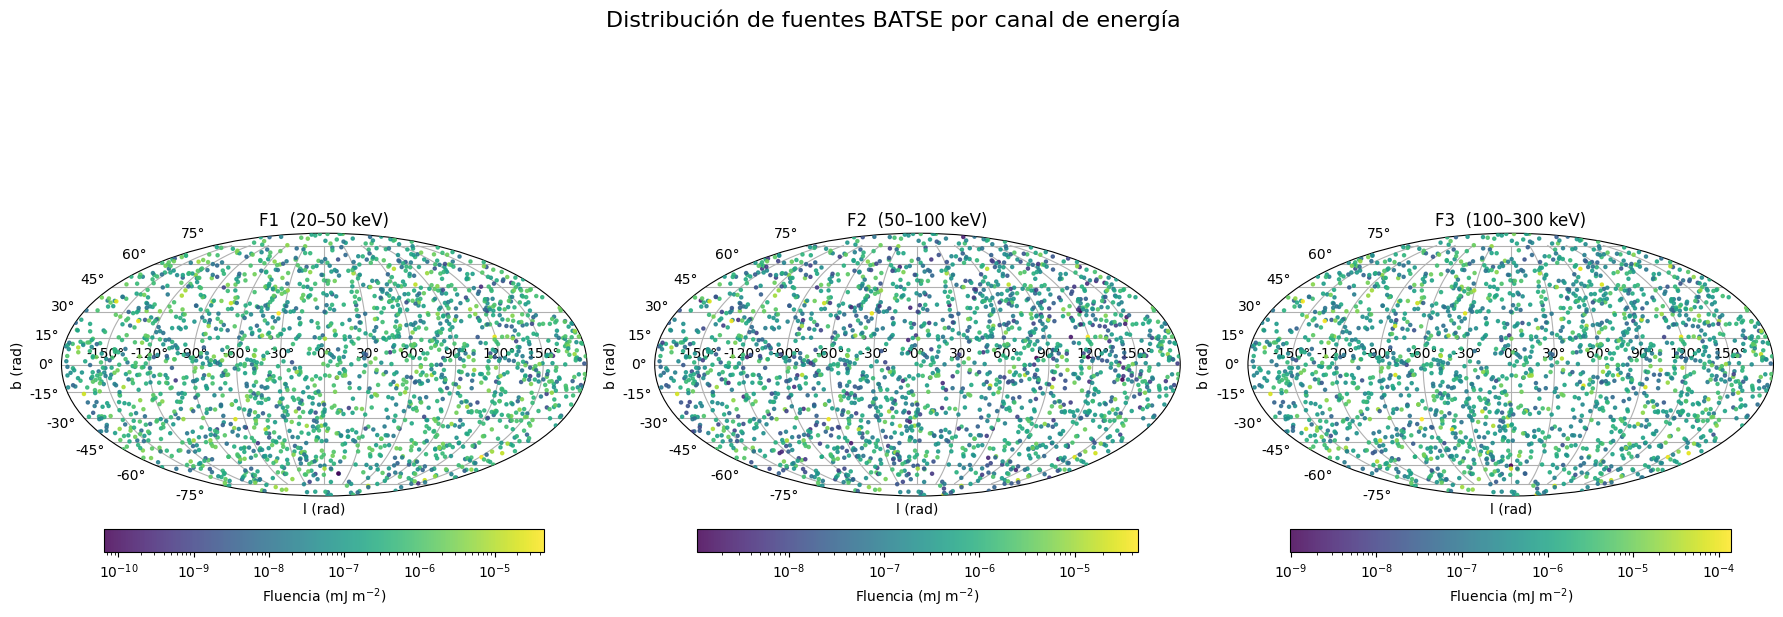

In [55]:
# ── Representación de las fuentes por canal energético ──────────────────────────
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.coordinates import SkyCoord
import astropy.units as u

# --- Coordenadas galácticas de cada fuente --------------------------------------
coords = SkyCoord(df_final['RAJ2000'], df_final['DEJ2000'], unit=(u.deg, u.deg))
l = coords.galactic.l.wrap_at(180 * u.deg).radian   # longitudes −π..π
b = coords.galactic.b.radian                        # latitudes −π/2..π/2

# --- Metadatos de los canales (VizieR IX/20A) -----------------------------------
energy_ranges = {
    'F1': '20–50 keV',
    'F2': '50–100 keV',
    'F3': '100–300 keV'
}

# --- Figura con tres paneles (uno por canal) ------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 6),
                         subplot_kw={'projection': 'mollweide'})
channels = ['F1', 'F2', 'F3']

for ax, ch in zip(axes, channels):
    # Scatter coloreado por fluencia en escala log; puntos pequeños para no saturar
    sc = ax.scatter(l, b, c=df_final[ch], s=5, cmap='viridis',
                    norm=LogNorm(vmin=df_final[ch].replace(0, float('nan')).min(),
                                 vmax=df_final[ch].max()),
                    alpha=0.85, zorder=5)
    ax.set_title(f'{ch}  ({energy_ranges[ch]})')
    ax.grid(True)
    ax.set_xlabel('l (rad)')
    ax.set_ylabel('b (rad)')
    # Colorbar compacta bajo cada sub-plot
    cbar = fig.colorbar(sc, ax=ax, orientation='horizontal',
                        fraction=0.046, pad=0.07)
    cbar.set_label('Fluencia (mJ m$^{-2}$)')

plt.suptitle('Distribución de fuentes BATSE por canal de energía', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

coger una fuente y ver como varia la fluencia en los distintos canales, podemos comparar F1 y F2 y colorear con F3. pywwt ponemos puntos de egret y las fuentes de batse y cada las ponemos de un color y lo ponemos lo mas grande posible y hacemos una captura. Es importante decir de donde viene cada fuente.

In [1]:
from pywwt.jupyter import connect_to_app 
wwt = await connect_to_app().becomes_ready()
wwt.layer_controls

In [59]:
dictio = {'ID': '211211A', 'trigger': '211211549', 'date': '2021'}

In [2]:
egret_layer = wwt.layers.add_table_layer(table=EGRET_cat[0], frame='Sky', 
                                         lon_att='RAJ2000', lat_att='DEJ2000')

NameError: name 'EGRET_cat' is not defined

In [9]:
batse_layer = wwt.layers.add_table_layer(table=BATSE_cat[0], frame='Sky', 
                                         lon_att='RAJ2000', lat_att='DEJ2000')

GRB 211211A 'trigger': '211211549', 'date': '2021'

In [57]:
import urllib.request

In [61]:
trigger_ = dictio['trigger']
year_    = dictio['date']

path_ = f'https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/{year_}/bn{trigger_}/current/'
file_fit = f'glg_tte_na_bn{trigger_}_v00.fit'
file_pha = f'glg_ctime_nb_bn{trigger_}_v00.pha'

urllib.request.urlretrieve(path_+file_fit, file_fit)
urllib.request.urlretrieve(path_+file_pha, file_pha)

('glg_ctime_nb_bn211211549_v00.pha', <http.client.HTTPMessage at 0x15c5eaa80>)

como evoluciona la curva de luz a lo largo del tiempo

In [5]:
pip install astro-gdt


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install astro-gdt-fermi


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
gdt-data init

SyntaxError: invalid syntax (2172162339.py, line 1)

tt no agrupa datos, tte si lo agrupa, tte lo agrupamos en fa

In [1]:
from gdt.core import data_path
from gdt.missions.fermi.gmb.tte import GmbTte

ModuleNotFoundError: No module named 'gdt.missions.fermi.gmb'

In [ ]:
filepath = data_path.joinpath('fermi-gbm/glg_tte_n9_bn090131090_v01.fit')
tte = GbmTte.open(filepath)
tte